In [120]:
import pandas as pd

In [121]:
strokeData = pd.read_csv("healthcare-dataset-stroke-data.csv")
strokeData.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


# RemoveID Column from Dataset

In [122]:
strokeData.drop(['id'],axis=1,inplace=True)

# Binning Age Column

<AxesSubplot:ylabel='Frequency'>

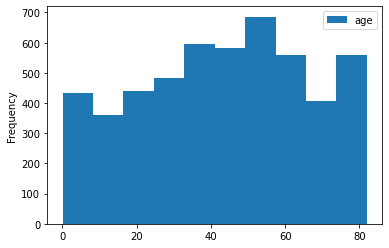

In [123]:
strokeData[['age']].plot.hist()

In [124]:
strokeData['age']=pd.cut(strokeData['age'],bins=[0,20,40,60,100],labels=['Teenage','Youth','Mid Age','Old Age'])

In [125]:
strokeData.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,Old Age,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,Old Age,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,Old Age,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,Mid Age,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,Old Age,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [126]:
strokeData['age']=strokeData['age'].astype(object)

In [127]:
strokeData.dtypes

gender                object
age                   object
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# Train and Test Split

In [128]:
x=strokeData.drop(['stroke'],axis=1)
y=strokeData[['stroke']]

In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=42)

In [130]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4599, 10), (511, 10), (4599, 1), (511, 1))

# Processing of Train Set

In [131]:
import numpy as np
strokeCategoricalTrain=x_train.select_dtypes(object)
strokeNumericalTrain=x_train.select_dtypes(np.number)

In [132]:
#Processing of Categorical Data

In [133]:
strokeCategoricalTrain.isna().sum()

gender            0
age               0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

In [134]:
# encoding
from sklearn.preprocessing import OneHotEncoder
ohEncoder=OneHotEncoder()

In [135]:
ohEncoder.fit(strokeCategoricalTrain)

OneHotEncoder()

In [136]:
strokeCategoricalTrainEncoded=pd.DataFrame(ohEncoder.transform(strokeCategoricalTrain).toarray())
strokeCategoricalTrainEncoded.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [137]:
# Numerical Data Processing

In [138]:
strokeNumericalTrain.isna().sum()

hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  187
dtype: int64

In [139]:
#filling null Values
# using interpolate method to fill null values
strokeNumericalTrain['bmi']=strokeNumericalTrain['bmi'].interpolate(method='polynomial',order=5)

<ipython-input-139-fe012de761cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strokeNumericalTrain['bmi']=strokeNumericalTrain['bmi'].interpolate(method='polynomial',order=5)


In [140]:
strokeNumericalTrain.head()

,hypertension,heart_disease,avg_glucose_level,bmi
386,1,0,251.60,27.1
2236,0,0,102.35,23.6
1419,0,0,81.94,27.7
3508,0,0,112.19,53.4
4264,0,0,66.69,21.5


In [141]:
# scaling the columns
from sklearn.preprocessing import RobustScaler
robScale=RobustScaler()

In [142]:
robScale.fit(strokeNumericalTrain)

RobustScaler()

In [143]:
strokeNumericalTrainEncoded=pd.DataFrame(robScale.transform(strokeNumericalTrain),columns=strokeNumericalTrain.columns)
strokeNumericalTrainEncoded.head()

,hypertension,heart_disease,avg_glucose_level,bmi
0,1.0,0.0,4.296137,-0.103093
1,0.0,0.0,0.278099,-0.463918
2,0.0,0.0,-0.271369,-0.041237
3,0.0,0.0,0.543007,2.608247
4,0.0,0.0,-0.681922,-0.680412


In [144]:
# Concatenation of Numerical and Categorical

In [145]:
trainSet=pd.concat([strokeCategoricalTrainEncoded,strokeNumericalTrainEncoded],axis=1)
trainSet.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,hypertension,heart_disease,avg_glucose_level,bmi
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.296137,-0.103093
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.278099,-0.463918
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.271369,-0.041237
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.543007,2.608247
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.681922,-0.680412


# Training Logistic Regression Model with OLS and Stochactic Gradient Descent

In [146]:
y_train.value_counts()

stroke
0         4375
1          224
dtype: int64

In [147]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
logReg=LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=0.3, fit_intercept=True, 
                          intercept_scaling=1, class_weight={0:1,1:5}, random_state=42, 
                          solver='lbfgs', max_iter=1000, multi_class='auto', verbose=0, warm_start=False,
                          n_jobs=None, l1_ratio=None)
sgdClass=SGDClassifier(loss='hinge',penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, 
                        max_iter=10000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None,
                        random_state=42, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, 
                        validation_fraction=0.1, n_iter_no_change=100, class_weight={0:1,1:5}, warm_start=False, average=False)

In [148]:
logReg.fit(trainSet,y_train)

C:\Users\balag\anaconda\envs\Test\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.3, class_weight={0: 1, 1: 5}, max_iter=1000,
                   random_state=42)

In [149]:
sgdClass.fit(trainSet,y_train)

C:\Users\balag\anaconda\envs\Test\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDClassifier(class_weight={0: 1, 1: 5}, max_iter=10000, n_iter_no_change=100,
              random_state=42)

# Processing of Test Set

In [150]:
# seperating categorical and Numerical columns
strokeCategoricalTest=x_test.select_dtypes(object)
strokeNumericalTest=x_test.select_dtypes(np.number)

In [151]:
strokeCategoricalTrain.isna().sum()

gender            0
age               0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

In [152]:
strokeCategoricalTestEncoded=pd.DataFrame(ohEncoder.transform(strokeCategoricalTest).toarray())
strokeCategoricalTestEncoded.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [153]:
# Numerical Data Processing

In [154]:
strokeNumericalTest.isna().sum()

hypertension          0
heart_disease         0
avg_glucose_level     0
bmi                  14
dtype: int64

In [155]:
strokeNumericalTest['bmi']=strokeNumericalTest['bmi'].interpolate(method='polynomial',order=5)

<ipython-input-155-3b766ab0287d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strokeNumericalTest['bmi']=strokeNumericalTest['bmi'].interpolate(method='polynomial',order=5)


In [156]:
strokeNumericalTest['bmi']=strokeNumericalTest['bmi'].fillna(strokeNumericalTest['bmi'].mean())

<ipython-input-156-92c8f99d1035>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strokeNumericalTest['bmi']=strokeNumericalTest['bmi'].fillna(strokeNumericalTest['bmi'].mean())


In [157]:
strokeNumericalTestEncoded=pd.DataFrame(robScale.transform(strokeNumericalTest),columns=strokeNumericalTrain.columns)
strokeNumericalTestEncoded.head()

,hypertension,heart_disease,avg_glucose_level,bmi
0,1.0,1.0,-0.282945,0.463918
1,0.0,0.0,-0.443936,0.701031
2,0.0,0.0,-0.264639,1.278351
3,0.0,0.0,0.074034,-0.092784
4,0.0,0.0,-0.236640,2.405140


# Concatenation of Numerical and Categorical

In [158]:
testSet=pd.concat([strokeCategoricalTestEncoded,strokeNumericalTestEncoded],axis=1)

In [159]:
predictionLogReg=logReg.predict(testSet)
predictionSGDClass=sgdClass.predict(testSet)
print(predictionSGDClass)
print(y_test.head(23))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 

In [160]:
#we need to convert these predictions into probabilities in order to change the threshold values
logRegProbs = logReg.predict_proba(testSet)
logRegProbs

array([[0.76613168, 0.23386832],
       [0.98750036, 0.01249964],
       [0.98501518, 0.01498482],
       ...,
       [0.98744603, 0.01255397],
       [0.98365403, 0.01634597],
       [0.44095473, 0.55904527]])

In [161]:
predictionsLogReg = np.where(logRegProbs[:,1]>0.6,1,0)
predictionsLogReg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Classification Metrics

In [162]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

# Metrics for Logistic Regression OLS

In [163]:
confusion_matrix(predictionLogReg,y_test)

array([[461,  20],
       [ 25,   5]], dtype=int64)

In [164]:
print("accuracy score:",accuracy_score(predictionLogReg,y_test))

accuracy score: 0.9119373776908023


In [165]:
print("recall_score:",recall_score(predictionLogReg,y_test))

recall_score: 0.16666666666666666


In [166]:
print("precision_score:",precision_score(predictionLogReg,y_test))

precision_score: 0.2


In [167]:
print("f1_score:",f1_score(predictionLogReg,y_test))

f1_score: 0.1818181818181818


# Stochastic Classifier

In [168]:
confusion_matrix(predictionSGDClass,y_test)

array([[473,  22],
       [ 13,   3]], dtype=int64)

In [169]:
print("accuracy_score:",accuracy_score(predictionSGDClass,y_test))

accuracy_score: 0.9315068493150684


In [170]:
print("recall_score:",recall_score(predictionSGDClass,y_test))

recall_score: 0.1875


In [171]:
print("precision_score:",precision_score(predictionSGDClass,y_test))

precision_score: 0.12


In [172]:
print("f1_score:",f1_score(predictionSGDClass,y_test))

f1_score: 0.14634146341463414


# ROC Curve Building

Logistic: ROC AUC=0.740


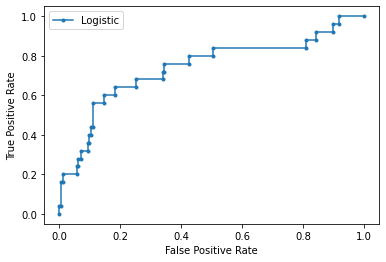

In [173]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot


# predict probabilities
lr_probs = logReg.predict_proba(testSet)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the y_test
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# HyperParameter Tuning

In [174]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [176]:
tuned_parameters_lr = [{'penalty': ['l1', 'l2'], 
                     'C': [0.1,0.001, 0.0001, 0.05, 0.2, 0.5, 0.3],
                     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]

In [177]:
clf = RandomizedSearchCV(LogisticRegression(), tuned_parameters_lr, cv=5,
                       scoring='recall')

In [179]:
import time
timeStart = time.time()
clf.fit(trainSet, y_train)
timeEnd = time.time()
print("Time Taken: ", (timeEnd - timeStart))

C:\Users\balag\anaconda\envs\Test\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\balag\anaconda\envs\Test\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\balag\anaconda\envs\Test\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\balag\anaconda\envs\Test\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\balag\anaconda\envs\

C:\Users\balag\anaconda\envs\Test\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\balag\anaconda\envs\Test\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\balag\anaconda\envs\Test\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\balag\anaconda\envs\Test\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

C:\Users\balag\anaconda\envs\Test\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\balag\anaconda\envs\Test\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\balag\anaconda\envs\Test\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\balag\anaconda\envs\Test\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

Time Taken:  7.131109714508057


In [180]:
print(clf.best_params_)

{'solver': 'saga', 'penalty': 'l1', 'C': 0.5}


In [182]:
predictionsHPT = clf.predict(testSet)

In [183]:
# Find All Scores for LR - HP Tuned

print("precision score: ", precision_score(predictionsHPT, y_test))
print("recall score: ", recall_score(predictionsHPT, y_test))
print("f1 score: ", f1_score(predictionsHPT, y_test))
print("accuracy score: ", accuracy_score(predictionsHPT, y_test))

precision score:  0.0
recall score:  0.0
f1 score:  0.0
accuracy score:  0.9510763209393346


C:\Users\balag\anaconda\envs\Test\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
